# Assignment 3: Dimensionality Reduction

---
Members
1. Kanyaluck Chimchome (64070501003)
2. Boonyarit Samran (64070501028)
3. Warisara Patib (64070501044)
4. Chanidapa Chanama (64070501090)
5. Nontawat Kunlayawuttipong (64070501093)
6. Nuttanon Yolnawa (64070507205)

**Load necessary packages and apply custom configurations**

In [5]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

# Suppress valuewarning when fitting ARIMA model.
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)


# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy import stats

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import statsmodels as sm
import sklearn as skl
from platform import python_version

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Python version', python_version())
print('Numpy version', np.__version__)
print('Scipy version', sp.__version__)
print('Pandas version', pd.__version__)
print('Matplotlib version', mpl.__version__)
# print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)
print('Sklearn version', skl.__version__)
###############################################

#plt.style.use('ggplot')
# plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

# sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)
#sns.color_palette("RdBu_r') # Good for heatmap


Python version 3.11.4
Numpy version 1.26.0
Scipy version 1.11.2
Pandas version 2.1.1
Matplotlib version 3.8.0
Statsmodels version 0.14.0
Sklearn version 1.3.1


## Eigenvalues and Eigenvectors

In [6]:
import numpy as np

np.set_printoptions(suppress=True,precision=4)

A = np.array([[1,-2],[1,4]])
A

array([[ 1, -2],
       [ 1,  4]])

<font color='blue'>Determine eigenpair of square matrix $A$

In [7]:
eigenVal, eigenVec = np.linalg.eig(A)
eigenVal, eigenVec

(array([2., 3.]),
 array([[-0.8944,  0.7071],
        [ 0.4472, -0.7071]]))

<font color='blue'>Determine norms of the eigenvectors

In [8]:
np.linalg.norm(eigenVec[:, 0]), np.linalg.norm(eigenVec[:, 1])

(0.9999999999999999, 0.9999999999999999)

Try 3x3 matrix

In [9]:
A_33 = np.array([[6,-2,-1],[-2,6,-1],[-1,-1,5]])
A_33

array([[ 6, -2, -1],
       [-2,  6, -1],
       [-1, -1,  5]])

<font color='blue'> Determine eigenpair of square matrix $A$ and norms of the eigenvectors

In [10]:
eigenVal_33, eigenVec_33 = np.linalg.eig(A_33)
eigenVal_33, eigenVec_33

(array([3., 8., 6.]),
 array([[ 0.5774,  0.7071, -0.4082],
        [ 0.5774, -0.7071, -0.4082],
        [ 0.5774, -0.    ,  0.8165]]))

In [11]:
np.linalg.norm(eigenVec_33[:, 0]), np.linalg.norm(eigenVec_33[:, 1]), np.linalg.norm(eigenVec_33[:, 2])

(0.9999999999999999, 1.0, 1.0)

## Sample covariance of data

Create a simple 2-column dataset.

In [12]:
import numpy as np

X1 = np.array([9,15,25,14,10,18,0,16,5,19,16,20])
X2 = np.array([39,56,93,61,50,75,32,85,42,70,66,80])
D = np.vstack((X1,X2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

[[ 9 39]
 [15 56]
 [25 93]
 [14 61]
 [10 50]
 [18 75]
 [ 0 32]
 [16 85]
 [ 5 42]
 [19 70]
 [16 66]
 [20 80]]


<font color='blue'>Determine the sample variances of $X_1$ and $X_2$

In [13]:
np.var(X1, ddof = 1)

47.71969696969697

In [14]:
np.sum((X1 - np.mean(X1)) * (X1-np.mean(X1)))/ (len(X1)-1)

47.71969696969697

In [15]:
np.var(X2, ddof = 1)

370.08333333333337

In [16]:
np.sum((X2 - np.mean(X2)) * (X2-np.mean(X2)))/ (len(X2)-1)

370.08333333333337

<font color='blue'>Convert the data to zero-mean 

In [17]:
X_zm = D - D.mean(axis = 0, keepdims = True)
X_zm

array([[ -4.9167, -23.4167],
       [  1.0833,  -6.4167],
       [ 11.0833,  30.5833],
       [  0.0833,  -1.4167],
       [ -3.9167, -12.4167],
       [  4.0833,  12.5833],
       [-13.9167, -30.4167],
       [  2.0833,  22.5833],
       [ -8.9167, -20.4167],
       [  5.0833,   7.5833],
       [  2.0833,   3.5833],
       [  6.0833,  17.5833]])

<font color='blue'> Determine the covariance matrix of $X$ using `np.cov`.  
`rowvar=False` to treat the variables column-wise.  
The sum is divided by  $N-1$ by default (option `bias=False` or `ddof=1`)


In [18]:
Z = np.cov(X_zm, rowvar = False)
Z

array([[ 47.7197, 122.947 ],
       [122.947 , 370.0833]])

## Linear PCA

<font color='blue'>Determine the eigenpairs of the covariance matrix $Z$ to get the principal components.  

In [19]:
eigenVal_Z, eigenVec_Z = np.linalg.eig(Z)
eigenVal_Z, eigenVec_Z

(array([  6.1812, 411.6219]),
 array([[-0.9474, -0.3201],
        [ 0.3201, -0.9474]]))

In [20]:
eigenVec_Z = eigenVec_Z[:, np.argsort(-eigenVal)]
eigenVal_Z = eigenVal_Z[np.argsort(-eigenVal)]
print("sorted eigen values: \n", eigenVal_Z)
print("sorted eigen vector: \n", eigenVec_Z)

sorted eigen values: 
 [411.6219   6.1812]
sorted eigen vector: 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]


<font color='blue'>Take $r$ principal components for dimensionality reduction

In [21]:
r = 2
Pr = eigenVec_Z[:, 0:r]
print(f"Matrix of {r} principle  component \n", Pr)

Matrix of 2 principle  component 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]


<font color='blue'>Transform the data to obtain the reduced-dimension data `X_pca` by multiplying  
    the zero-mean data $X$ to the matrix of principal components $P$.

In [22]:
X_pca = X_zm @ Pr
X_pca

array([[ 23.7584,  -2.8373],
       [  5.7323,  -3.0802],
       [-32.5219,  -0.711 ],
       [  1.3155,  -0.5324],
       [ 13.0171,  -0.2637],
       [-13.2283,   0.1592],
       [ 33.2709,   3.4487],
       [-22.0621,   5.2548],
       [ 22.1966,   1.9125],
       [ -8.8115,  -2.3886],
       [ -4.0617,  -0.8268],
       [-18.6054,  -0.1352]])

<font color='blue'>Inverse-transform the data by multiplying the transformed data and the matrix of principal components. 

In [23]:
X_inverse = X_pca @ Pr.T
X_inverse

array([[ -4.9167, -23.4167],
       [  1.0833,  -6.4167],
       [ 11.0833,  30.5833],
       [  0.0833,  -1.4167],
       [ -3.9167, -12.4167],
       [  4.0833,  12.5833],
       [-13.9167, -30.4167],
       [  2.0833,  22.5833],
       [ -8.9167, -20.4167],
       [  5.0833,   7.5833],
       [  2.0833,   3.5833],
       [  6.0833,  17.5833]])

<font color='blue'>Determine the variance explained by each principal component.

In [24]:
for i in range(2):
    print(Pr[i,i])

-0.3200824438033751
0.3200824438033751


## Multidimensional Distance Scaling (MDS)

In [25]:
from sklearn import manifold
from sklearn.datasets import make_swiss_roll
from sklearn.metrics.pairwise import pairwise_distances

X, color = make_swiss_roll(n_samples=800, random_state=123)

### Classical MDS

Mininum Stress:  3890557.908268913


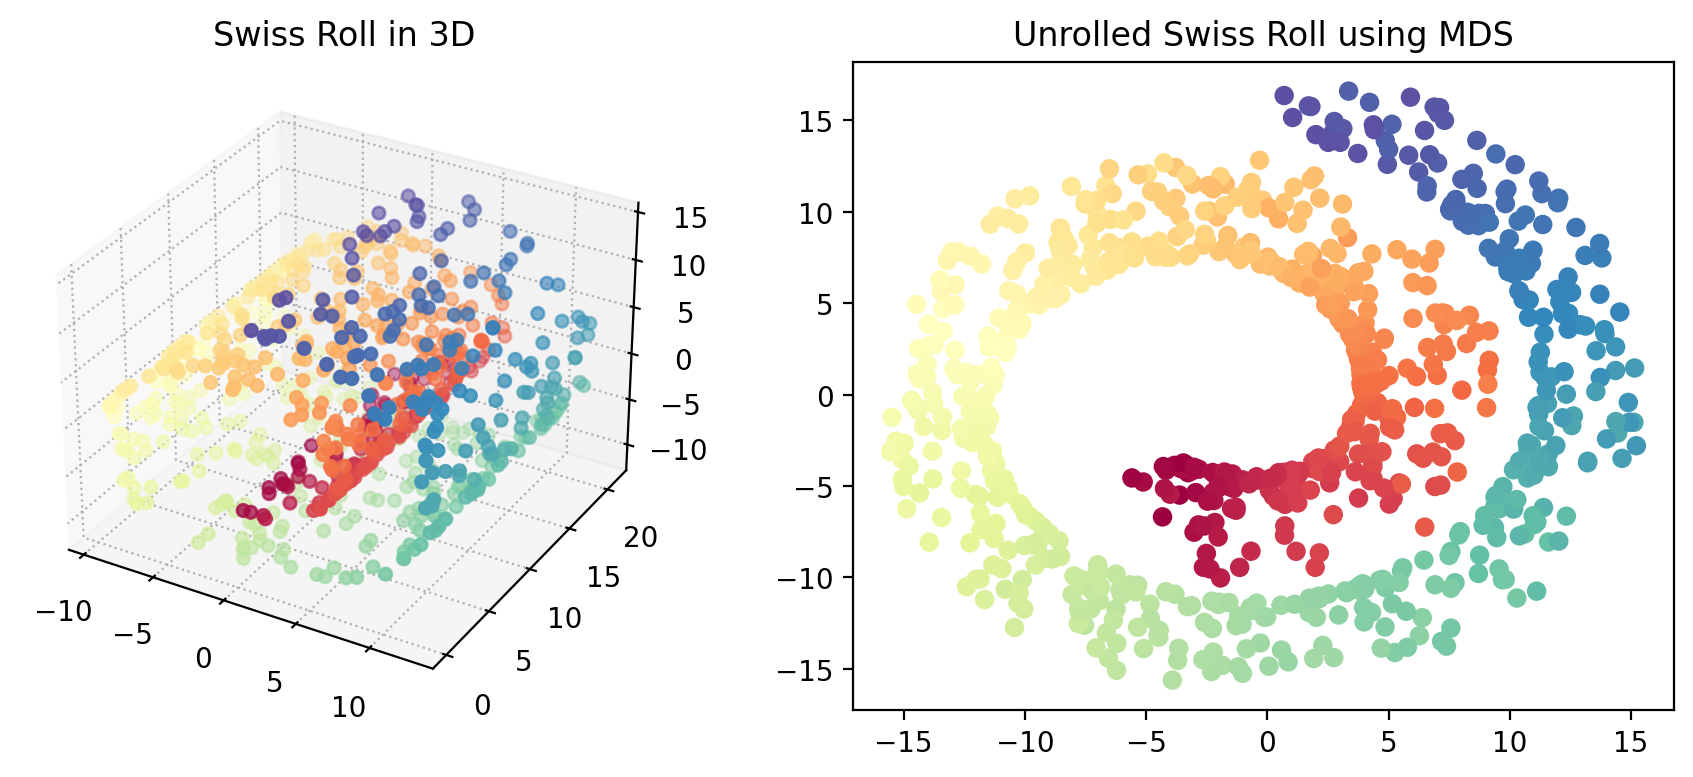

In [26]:
dist_matrix=pairwise_distances(X, metric='euclidean')

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(dist_matrix)

X_mds = results.embedding_
print('Mininum Stress: ', results.stress_)

fig = plt.figure(figsize=(9,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll in 3D")

ax = fig.add_subplot(122)
ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
#plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using MDS')
plt.tight_layout();

### Manhattan Distance

Mininum Stress:  10460330.045383375


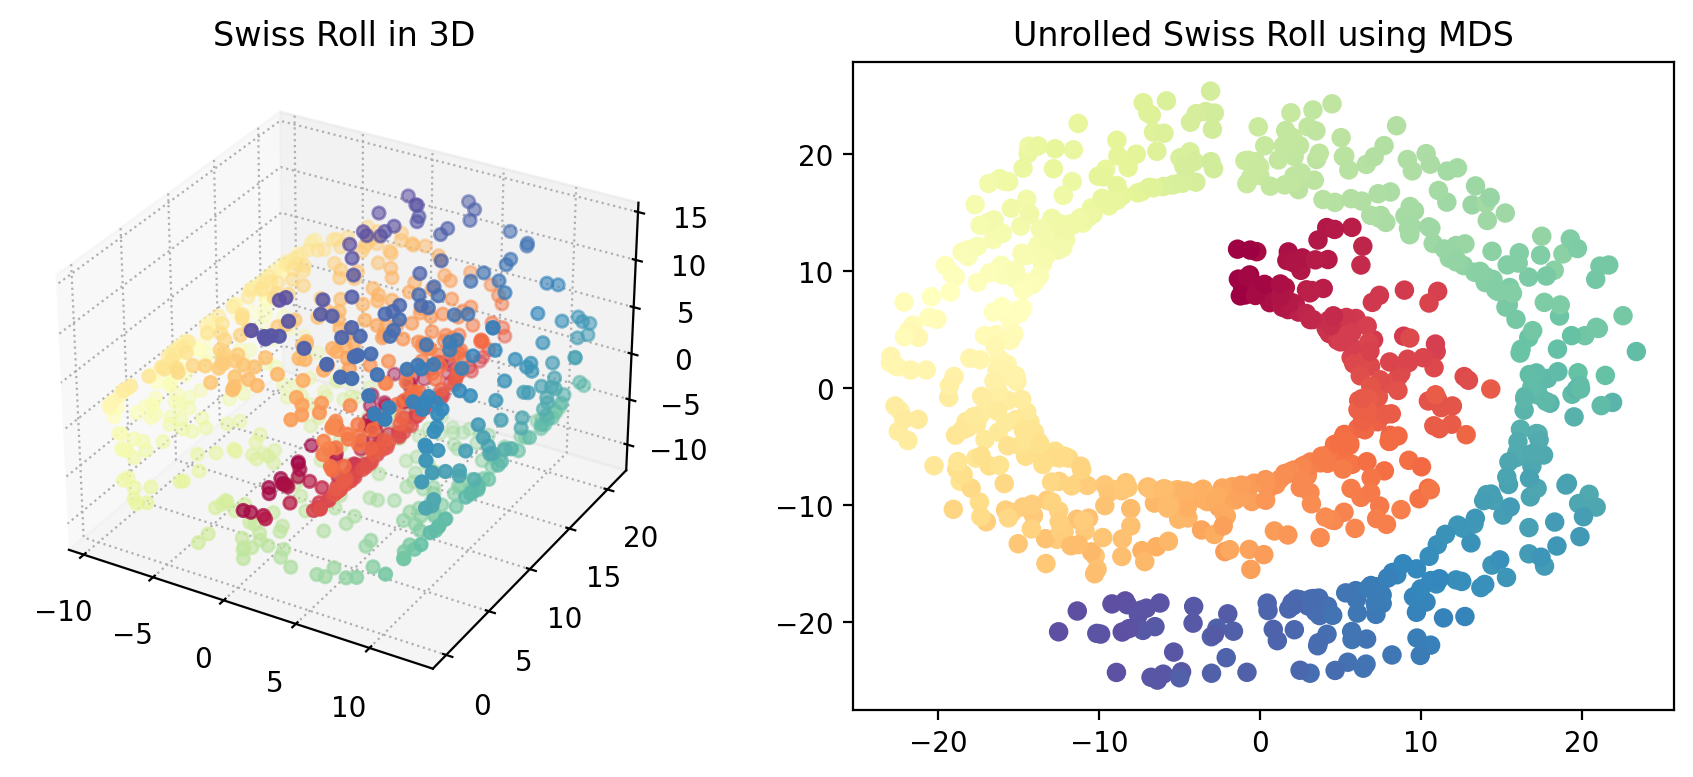

In [27]:
dist_matrix=pairwise_distances(X, metric='manhattan')

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=123)
results = mds.fit(dist_matrix)

X_mds = results.embedding_
print('Mininum Stress: ', results.stress_)

fig = plt.figure(figsize=(9,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll in 3D")

ax = fig.add_subplot(122)
ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
#plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using MDS')
plt.tight_layout();

### Non-metric MDS

In [28]:
AirlineDist = np.array([[0,1068,461,549,805,508,505,2197,366,558,2467,467],
                    [1068,0,867,769,1819,941,1494,3052,1355,1178,2747,1379],
                    [461,867,0,107,943,108,618,2186,502,338,2067,928],
                    [549,769,107,0,1050,172,725,2245,586,409,2131,985],
                    [805,1819,943,1050,0,882,325,1403,464,645,1891,1077],
                    [508,941,108,172,882,0,562,2080,436,234,1959,975],
                    [505,1494,618,725,325,562,0,1701,137,353,1988,912],
                    [2197,3052,2186,2245,1403,2080,1701,0,1831,1848,1227,2480],
                    [366,1355,502,586,464,436,137,1831,0,294,2042,779],
                    [558,1178,338,409,645,234,353,1848,294,0,1820,1016],
                    [2467,2747,2067,2131,1891,1959,1988,1227,2042,1820,0,2821],
                    [467,1379,928,985,1077,975,912,2480,779,1016,2821,0]])
Cities = ['Atlanta','Boston','Cincinati','Columbus','Dallas','Indiannapolis','Little Rock',
        'Los Angeles','Memphis','St.Louis', 'Spokane','Tampa']

In [29]:
AirlineDist.shape
from scipy.linalg import issymmetric
issymmetric(AirlineDist)

(12, 12)

True

Mininum Stress:  0.19912093875865716


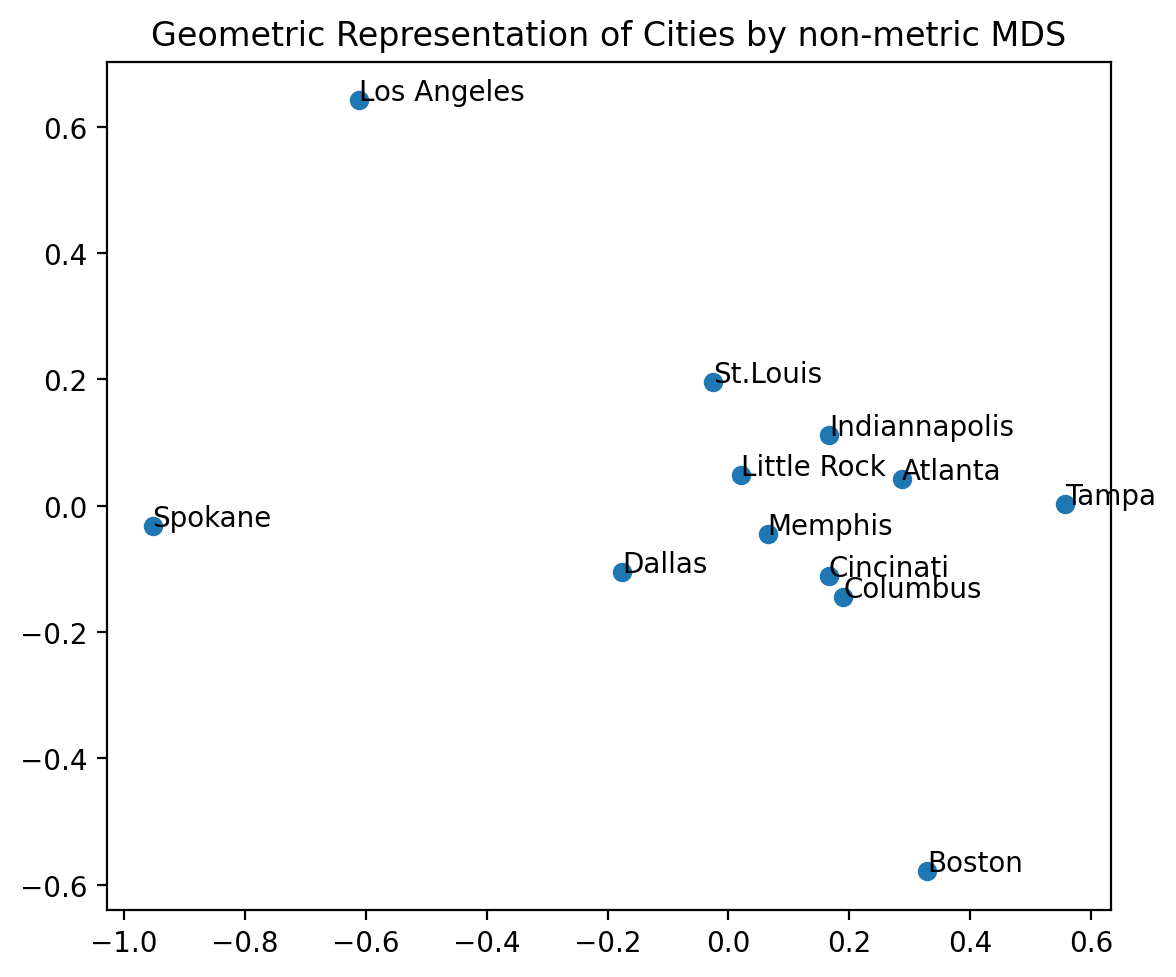

In [30]:
mds = manifold.MDS(n_components=2, metric=False,
                   dissimilarity="precomputed", random_state=6)
results = mds.fit(AirlineDist)

X_mds = results.embedding_
print('Mininum Stress: ', results.stress_)

fig,ax = plt.subplots(figsize=(6,5));
plt.scatter(X_mds[:, 0], X_mds[:, 1]);
plt.axis('tight');
#plt.xticks([]), plt.yticks([])
plt.title('Geometric Representation of Cities by non-metric MDS');
for index in range(X_mds.shape[0]):
  ax.text(X_mds[index,0], X_mds[index,1], Cities[index], size=10);
plt.tight_layout();

## <font color='darkorange'>In-Class Activity: Dimensionaltiy reduction with PCA<font>

Load the data from sheet `MTCARS` in file `Dimensionality-reduction.xlsx`

In [35]:
df = pd.read_excel("./data/dimensionality-reduction.xlsx", sheet_name = "MTCARS")
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Center the input and compute the covariance matrix

In [36]:
X = np.array(df)
X_zm = X - X.mean(axis = 0, keepdims = True)
Z = np.cov(X_zm, rowvar = False)
Z.shape

(11, 11)

Determine the principal components

In [37]:
eigenVal_Z, eigenVec_Z = np.linalg.eig(Z)
eigenVal_Z.shape, eigenVec_Z.shape

((11,), (11, 11))

In [38]:
eigenVec_Zsorted = eigenVec_Z[:, np.argsort(-eigenVal_Z)]
eigenVal_Zsorted = eigenVal_Z[np.argsort(-eigenVal_Z)]
print("sorted eigen values: \n", eigenVal_Zsorted)
print("sorted eigen vector: \n", eigenVec_Zsorted.shape)

sorted eigen values: 
 [18641.2732  1455.2758     9.4311     1.7073     0.8217     0.4403
     0.0952     0.0818     0.0628     0.0444     0.0394]
sorted eigen vector: 
 (11, 11)


Perform the transformation and determine the proportion of variance of explained by the first $r$ components.

In [39]:
r = 11
Pr = eigenVec_Zsorted[:, 0:r]
print(f"matrix of {r} principle component \n", Pr)

matrix of 11 principle component 
 [[ 0.0381 -0.0092  0.9821  0.0476 -0.0883 -0.1438 -0.0392  0.0227  0.0028
   0.0306 -0.0159]
 [-0.012   0.0034 -0.0635 -0.228   0.2387 -0.7938  0.425  -0.189  -0.0427
   0.1317  0.1454]
 [-0.8996 -0.4354  0.0314 -0.0051 -0.0107  0.0074  0.0006 -0.0006 -0.0035
  -0.0054  0.0009]
 [-0.4348  0.8993  0.0251  0.0357  0.0166  0.0017 -0.0022  0.      0.0037
   0.0019 -0.0022]
 [ 0.0027  0.0039  0.0397 -0.0571 -0.1333  0.2272  0.0348 -0.9386  0.0141
   0.1841 -0.0974]
 [-0.0062 -0.0049 -0.0849  0.128  -0.2435 -0.1271 -0.1866  0.1562  0.3906
   0.8299 -0.0199]
 [ 0.0067 -0.025  -0.0717  0.8865 -0.2142 -0.1896  0.2548 -0.1029  0.0959
  -0.2042  0.0111]
 [ 0.0027 -0.0022  0.0042  0.1771 -0.0169  0.1026 -0.0808 -0.0021 -0.684
   0.3031  0.6257]
 [ 0.002   0.0058  0.0548 -0.1357 -0.0627  0.2052  0.2009 -0.0227  0.5724
  -0.1628  0.7332]
 [ 0.0026  0.0113  0.0485 -0.1299 -0.2762  0.335   0.8016  0.2175 -0.1561
   0.2035 -0.1909]
 [-0.0058  0.0278 -0.1029 -0.2689 -0

<font color='darkorange'>**Questions**: 

 1. What are the amount of variation explained by each PC?  

In [40]:
for i in range(len(eigenVal_Zsorted)):
    print(eigenVec_Zsorted[i,i])

0.03811819850839624
0.003372487161162643
0.03144265618286097
0.03571563833936832
-0.13332764515622708
-0.12714229566839572
0.25484454805225615
-0.002132902541646931
0.5723724331444977
0.20354064501578054
0.05579579683483754


__there is 11 values from 11 predicors.__

2. How many PCs are sufficient to explain at least 90% of the total variation in the data?

In [91]:
maximum = np.sum(eigenVal_Z)
total = 0
count = 0
if (eigenVal_Z[0]/maximum) > 0.9:
    count = 1
for i in range(len(eigenVal_Z)):
    total += eigenVal_Z[i]
    if total/maximum > 0.9:
        break
    count +=1
print(count)

1


In [42]:
eigenVal_Z

array([18641.2732,  1455.2758,     9.4311,     1.7073,     0.8217,
           0.4403,     0.0952,     0.0818,     0.0394,     0.0444,
           0.0628])

3. Which of the original features get large weights in PC1?

In [44]:
np.argsort(-eigenVal_Z)
eigenVal_Z

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10,  9,  8], dtype=int64)

array([18641.2732,  1455.2758,     9.4311,     1.7073,     0.8217,
           0.4403,     0.0952,     0.0818,     0.0394,     0.0444,
           0.0628])

Therefore, we could see that the first value has the largest value.

In [49]:
eigenVec_Z[:, 0]

array([ 0.0381, -0.012 , -0.8996, -0.4348,  0.0027, -0.0062,  0.0067,
        0.0027,  0.002 ,  0.0026, -0.0058])

\# And we could see that feature 3 is the largest weight.

 4. Standarding the input variables before applying PCA and repeat 1-3.  Do the PCA outputs differ significantly between standardizing and not standardizing the dataset before applying PCA? Explain the results.

In [75]:
X

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          1.   ,   1.   ,   4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          0.   ,   0.   ,   3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          0.   ,   0.   ,   3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          1.   ,   0.   ,   4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
 

In [74]:
X_zm_ = X - X.mean(axis = 0, keepdims = True)

In [76]:
X_std = X/X.std(axis = 0, keepdims = True)

In [77]:
X_std

array([[ 3.5401,  3.4134,  1.3116,  1.63  ,  7.4108,  2.7205,  9.3587,
         0.    ,  2.0361,  5.5082,  2.5161],
       [ 3.5401,  3.4134,  1.3116,  1.63  ,  7.4108,  2.9853,  9.677 ,
         0.    ,  2.0361,  5.5082,  2.5161],
       [ 3.8435,  2.2756,  0.8853,  1.3781,  7.3158,  2.409 , 10.5811,
         2.0158,  2.0361,  5.5082,  0.629 ],
       [ 3.6075,  3.4134,  2.115 ,  1.63  ,  5.8526,  3.3384, 11.053 ,
         2.0158,  0.    ,  4.1312,  0.629 ],
       [ 3.1524,  4.5512,  2.9511,  2.5932,  5.9857,  3.572 ,  9.677 ,
         0.    ,  0.    ,  4.1312,  1.258 ],
       [ 3.0512,  3.4134,  1.8445,  1.5559,  5.2446,  3.5928, 11.4965,
         2.0158,  0.    ,  4.1312,  0.629 ],
       [ 2.4106,  4.5512,  2.9511,  3.6305,  6.0997,  3.707 ,  9.0061,
         0.    ,  0.    ,  4.1312,  2.5161],
       [ 4.1133,  2.2756,  1.2026,  0.9187,  7.0118,  3.3124, 11.3714,
         2.0158,  0.    ,  5.5082,  1.258 ],
       [ 3.8435,  2.2756,  1.1542,  1.4078,  7.4488,  3.2709, 13.0202,
 

4.1

In [78]:
Z_ = np.cov(X_std, rowvar = False)
Z_.shape

(11, 11)

In [79]:
eigenVal_Z_, eigenVec_Z_ = np.linalg.eig(Z_)
eigenVal_Z_.shape, eigenVec_Z_.shape

((11,), (11, 11))

In [80]:
eigenVec_Zsorted_ = eigenVec_Z_[:, np.argsort(-eigenVal_Z_)]
eigenVal_Zsorted_ = eigenVal_Z_[np.argsort(-eigenVal_Z_)]
print("sorted eigen values: \n", eigenVal_Zsorted_)
print("sorted eigen vector: \n", eigenVec_Zsorted_.shape)

sorted eigen values: 
 [6.8216 2.736  0.6474 0.2783 0.2307 0.2184 0.1396 0.1269 0.0795 0.0537
 0.0228]
sorted eigen vector: 
 (11, 11)


In [81]:
r_ = 11
Pr_ = eigenVec_Zsorted_[:, 0:r_]
print(f"matrix of {r_} principle component \n", Pr_)

matrix of 11 principle component 
 [[ 0.3625 -0.0161  0.2257 -0.0225  0.1028  0.1088 -0.3677  0.7541  0.2357
   0.1393  0.1249]
 [-0.3739 -0.0437  0.1753 -0.0026  0.0585 -0.1686 -0.0573  0.2308  0.054
  -0.8464  0.1407]
 [-0.3682  0.0493  0.0615  0.2566  0.394   0.3362 -0.2143 -0.0011  0.1984
   0.0494 -0.6606]
 [-0.3301 -0.2488 -0.14   -0.0677  0.54   -0.0714  0.0015  0.2224 -0.5758
   0.2478  0.2565]
 [ 0.2942 -0.2747 -0.1612  0.8548  0.0773 -0.2445 -0.0211 -0.0322 -0.0469
  -0.1015  0.0395]
 [-0.3461  0.143  -0.3418  0.2459 -0.075   0.4649  0.0207  0.0086  0.3595
   0.0944  0.5674]
 [ 0.2005  0.4634 -0.4032  0.0681 -0.1647  0.3305 -0.05    0.2318 -0.5284
  -0.2707 -0.1814]
 [ 0.3065  0.2316 -0.4288 -0.2148  0.5995 -0.194   0.2658 -0.0259  0.3586
  -0.159  -0.0084]
 [ 0.2349 -0.4294  0.2058 -0.0305  0.0898  0.5708  0.5873  0.0597 -0.0474
  -0.1778 -0.0298]
 [ 0.2069 -0.4623 -0.2898 -0.2647  0.0483  0.2436 -0.6051 -0.3362 -0.0017
  -0.2138  0.0535]
 [-0.214  -0.4136 -0.5285 -0.1268 -0

In [82]:
for i in range(len(eigenVal_Zsorted_)):
    print(eigenVec_Zsorted_[i,i])

0.3625305035702481
-0.043743712706462774
0.06148413560075436
-0.06767615658346783
0.07732727371553313
0.46493963804657484
-0.0500105222644894
-0.02593512789173249
-0.04740398244520253
-0.21382515388267012
-0.31959467614217424


__there is 11 values from 11 predicors.__

4.2

In [90]:
maximum_ = np.sum(eigenVal_Z_)
total_ = 0
count_ = 0
if (eigenVal_Z_[0]/maximum_) > 0.9:
    count_ = 1
for i in range(len(eigenVal_Z_)):
    total_ += eigenVal_Z_[i]
    if (total_/maximum_) > 0.9:
        break
    count_ +=1
print(count_)

3


In [92]:
eigenVal_Z_

array([6.8216, 2.736 , 0.6474, 0.0228, 0.0537, 0.0795, 0.1269, 0.1396,
       0.2783, 0.2307, 0.2184])

4.3

In [93]:
np.argsort(-eigenVal_Z_)
eigenVal_Z_

array([ 0,  1,  2,  8,  9, 10,  7,  6,  5,  4,  3], dtype=int64)

array([6.8216, 2.736 , 0.6474, 0.0228, 0.0537, 0.0795, 0.1269, 0.1396,
       0.2783, 0.2307, 0.2184])

Therefore, we could see that the first value has the largest value.

In [94]:
eigenVec_Z_[:, 0]

array([ 0.3625, -0.3739, -0.3682, -0.3301,  0.2942, -0.3461,  0.2005,
        0.3065,  0.2349,  0.2069, -0.214 ])

\# And we could see that feature 2 is the largest weight.